## En este notebook vamos a analizar los checkout y las caracteristicas de estos celulares. Ademas vamos a analizar las busquedas y ver si hay una correlacion entre los eventos.

In [1]:
#Inlcuimos las librerias que vamos a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

In [3]:
#categorizamos
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')

In [4]:
checkout = events[events['event'] == 'checkout']
checkout = checkout[['timestamp', 'person','model','condition','storage','color']]
checkout.head()

,timestamp,person,model,condition,storage,color
3,2018-05-31 23:38:40,0004b0a2,iPhone 5s,Bom,32GB,Cinza espacial
7,2018-05-29 13:29:35,0006a21a,Samsung Galaxy S8,Bom,64GB,Dourado
44,2018-05-24 11:34:32,000a54b2,Motorola Moto Z Play,Bom,32GB,Preto
85,2018-04-06 05:14:58,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto
86,2018-04-06 05:18:15,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto


In [5]:
checkout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33735 entries, 3 to 1011287
Data columns (total 6 columns):
timestamp    33735 non-null datetime64[ns]
person       33735 non-null object
model        33733 non-null object
condition    33733 non-null object
storage      33733 non-null object
color        33733 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 1.8+ MB


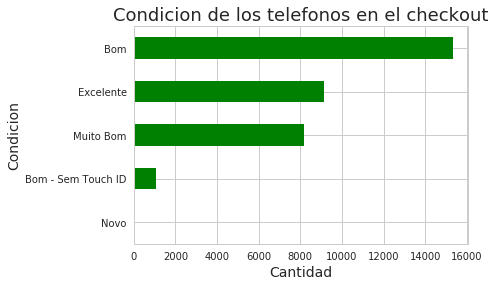

In [39]:
g = checkout['condition'].value_counts().sort_values().plot(kind = 'barh',color='green')
g.set_title('Condicion de los telefonos en el checkout',fontsize = 18)
g.set_ylabel('Condicion',fontsize = 14)
g.set_xlabel('Cantidad',fontsize = 14);

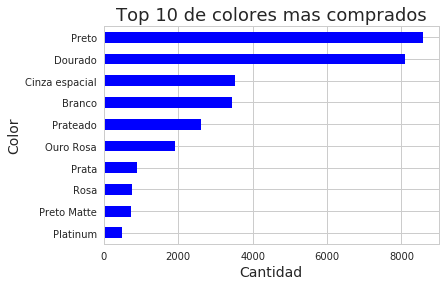

In [7]:
g = checkout['color'].value_counts().head(10).sort_values().plot(kind = 'barh',color ='blue')
g.set_title('Top 10 de colores mas en el checkout',fontsize = 18)
g.set_ylabel('Color',fontsize = 14)
g.set_xlabel('Cantidad',fontsize = 14);

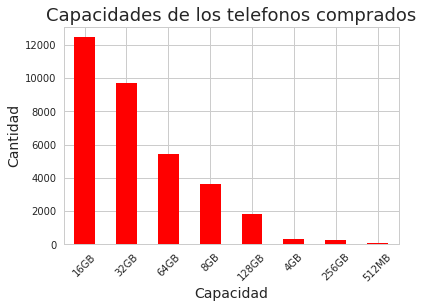

In [8]:
g = checkout['storage'].value_counts().plot(kind = 'bar', color='red')
g.set_title('Capacidades de los telefonos en el checkout',fontsize = 18)
g.set_xlabel('Capacidad',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

Se puede ver que los telefonos de 16GB/32GB/64GB/128GB son los que mas veces llegaron al checkout, mientras que los de menor capacidad no tiene una alta demanda, se recomienda tener mas stock de estos telefonos

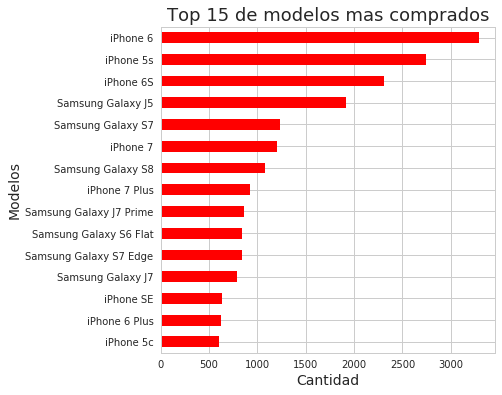

In [9]:
check = checkout['model'].value_counts().head(15).sort_values()
g = plt.subplots(figsize = (6,6))
g = check.plot(kind = 'barh', color = 'red')
g.set_title('Top 15 de modelos en el checkout',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14); #Estaria bueno superponer este grafico con el otro para compara el ranking de busqueda contra compra
                                      #y sacar conclusiones

#### Al igual que los modelos mas buscados, los iPhone son los telefonos mas demandados. En segundo lugar estan los Samsung galaxy S7, S8 y J5. 

#### Analizamos las caracteristicas de los modelos mas comprados

In [40]:
iPhone6_checkout = checkout[checkout['model'] == 'iPhone 6']
iPhone6_checkout = iPhone6_checkout[['storage','condition']]
iPhone6_checkout = pd.DataFrame(iPhone6_checkout.groupby('storage')['condition'].value_counts())
iPhone6_checkout = iPhone6_checkout.rename(columns = {'condition':'cantidad'})
iPhone6_checkout = iPhone6_checkout.reset_index()
iPhone6_checkout = iPhone6_checkout.rename(columns = {'storage':'capacidad'})
iPhone6_checkout = iPhone6_checkout.pivot('capacidad','condition','cantidad')
iPhone6_checkout

condition,Bom,Bom - Sem Touch ID,Excelente,Muito Bom
capacidad,,,,
128GB,110,5,60,60
16GB,903,284,438,298
64GB,524,10,326,277


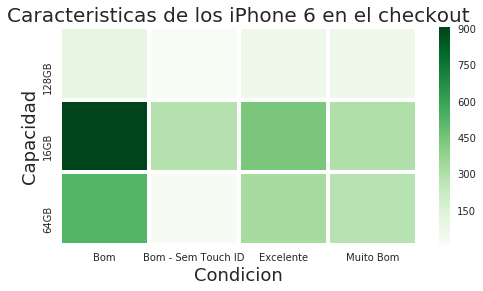

In [43]:
plt.figure(figsize = (8,4))
ax = sns.heatmap(iPhone6_checkout,linewidth = 3, cmap = 'Greens')
ax.set_title('Caracteristicas de los iPhone 6 en el checkout',Fontsize = 20)
ax.set_ylabel('Capacidad',Fontsize = 18)
ax.set_xlabel('Condicion',fontsize = 18);

In [12]:
#Se podria analizar las marcas y comparar tambien
#Conviene hacer un grafico de los modelos mas comprados teniendo en cuenta sus capacidades?

#### ¿Los clientes quedan conformes con el servicio brindado? #no 

In [13]:
checkout['person'].value_counts().mean() #en promedio la persona que compro una ves no esta volviendo a comprar, se esta haciendo
                                         #poca publicidad sobre la gente que ya compro? Estan quedando satisfechos con el servicio?
                                         #Los productos son buenos entonces la gente no tiene que volver a comprar? Hay que tener en cuenta
                                         #que los datos son solo del 2018

1.22122067767159

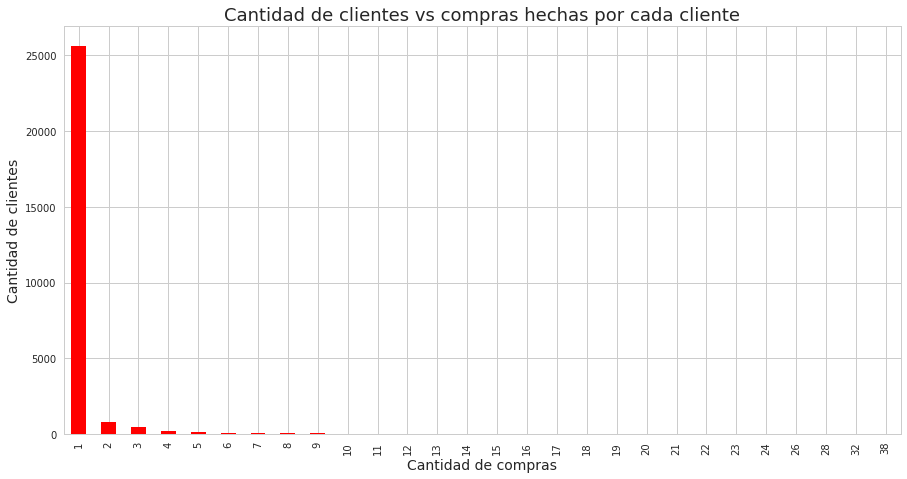

In [14]:
g = checkout['person'].value_counts().value_counts().sort_index().plot(kind = 'bar', color='red',  figsize=(15,7.5) ) # con normalize = True en value_counts se podria mostrar en % 
g.set_title('Cantidad de clientes vs compras hechas por cada cliente',fontsize = 18)
g.set_xlabel('Cantidad de compras',fontsize = 14)
g.set_ylabel('Cantidad de clientes',fontsize = 14);

#### Se puede ver en el grafico que la gran mayoria de los compadores no vuelven a comprar, se podria realizar algun tipo de encuesta para saber si quedan satisfechos con el serviocio brindado

#### ¿Cuando hay mayor actividad en el checkout a lo largo de la semana?

In [15]:
dias = checkout['timestamp'].dt.weekday_name.value_counts().sort_values()
dias = dias.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dias

Monday       4621
Tuesday      5928
Wednesday    5772
Thursday     5559
Friday       5244
Saturday     3474
Sunday       3137
Name: timestamp, dtype: int64

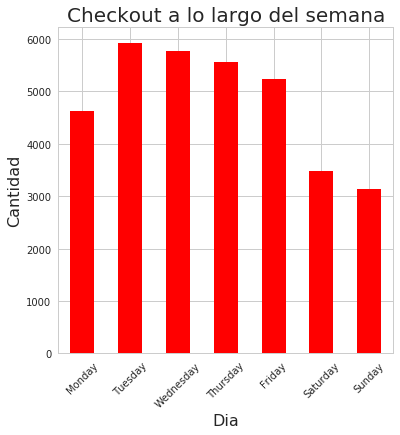

In [44]:
#este grafico deberia empezar de 1?
g = plt.subplots(figsize = (6,6))
g = dias.plot(kind = 'bar',color='red')
g.set_title('Checkout a lo largo del semana',fontsize = 20)
g.set_xlabel('Dia',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10);

#### ¿Cuando hubo mayor actividad en el checkout a lo largo del año?

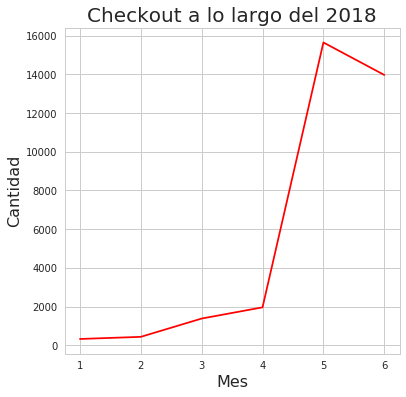

In [45]:
check = checkout['timestamp'].dt.month.value_counts().sort_index() #este grafico deberia empezar de 1?
g = plt.subplots(figsize = (6,6))
g = check.plot(color='red')
g.set_title('Checkout a lo largo del 2018',fontsize = 20)
g.set_xlabel('Mes',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);

#### Checkout del primer trimestre vs checkout en el segundo trimestre

In [18]:
primer_trimestre = checkout[checkout['timestamp'].dt.month < 4]['timestamp'].dt.month.value_counts().sort_index()
segundo_trimestre = checkout[checkout['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()

In [19]:
trimestres = pd.DataFrame({'First term':primer_trimestre.values,'Second term':segundo_trimestre.values})

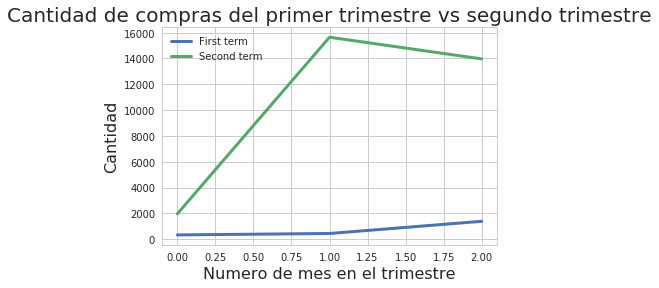

In [20]:
g = trimestres.plot(linewidth=3)
g.set_title('Cantidad de checkout del primer trimestre vs segundo trimestre',fontsize = 20)
g.set_xlabel('Numero de mes en el trimestre',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16); #como cambio el eje x

Se puede ver como en el segundo trimestre del año la actividad en la pagina crecio, esto puede ser por una falta de datos del primer trimestre o por la publicadad que se hizo. #Nose si estaria bien poner algo asi

## Productos y marcas mas buscadas

In [21]:
searched_products = events[events['event'] == 'searched products']
searched_products = searched_products[['timestamp','person','search_term']]
searched_products.head()

,timestamp,person,search_term
157,2018-02-06 02:29:49,00204059,moto g 4
159,2018-02-06 02:32:41,00204059,moto g 4
238,2018-05-21 19:56:33,0024ad28,comprar celulares usados bom e barato em poa rs
239,2018-05-21 19:57:28,0024ad28,comprar celulares seminovos bom e barato em po...
240,2018-05-21 19:57:49,0024ad28,comprar celulares seminovos bom e barato em po...


In [22]:
searched_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56073 entries, 157 to 1011280
Data columns (total 3 columns):
timestamp      56073 non-null datetime64[ns]
person         56073 non-null object
search_term    48967 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [23]:
searched_products['search_term'].isnull().value_counts() #abria que decidir que hacemos con los nulls

False    48967
True      7106
Name: search_term, dtype: int64

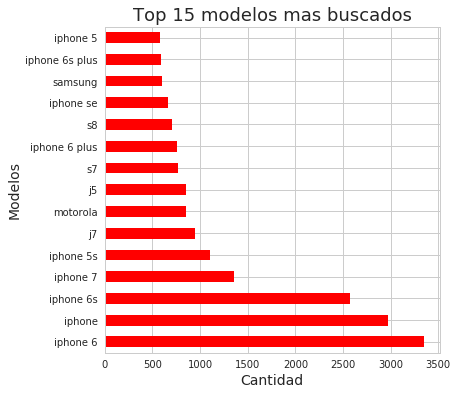

In [24]:
busquedas = searched_products['search_term'].dropna().map(lambda x: x.lower()).value_counts().head(15)
g = plt.subplots(figsize = (6,6))
g = busquedas.plot(kind = 'barh',color='red')
g.set_title('Top 15 modelos mas buscados',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14);

In [25]:
#el diccionario esta hecho a mano, vi las primeras posiciones y de ahi arme el diccionario, se podria pensar algo mejor. 
#no vi por ahora alguna funcion que haga la que defini, por ahi hay algo hecho pero no encontre
marcas = {'iPhone':['iphone','7s','6s','5se','5c','iphone se'], 'Samsung':['j1','j2','j3','j4','j5','j6','j7','galaxy','s7','s6','s5','s8','s9','samsung'], 'Motorola':['moto'],'LG':['lg']}
def asignar_marca(modelo):
    for marca in marcas:
        for m in marcas[marca]:
            if m in modelo:
                return marca
    return 'Otro'
marcas_buscadas = searched_products['search_term'].dropna().map(lambda x: asignar_marca(x.lower())).value_counts()
marcas_buscadas #creo que es bastante que queden 8000 en otro

iPhone      18982
Samsung     14659
Otro         8369
Motorola     5773
LG           1184
Name: search_term, dtype: int64

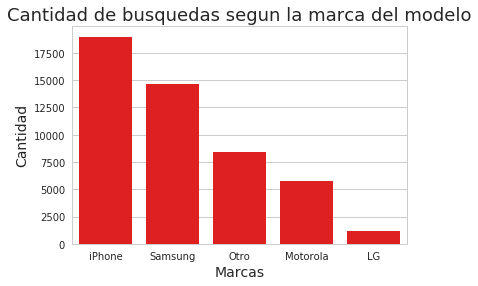

In [26]:
g = sns.barplot(x= marcas_buscadas.index, y=marcas_buscadas.values, orient= 'v',color='red')
g.set_title('Cantidad de busquedas segun la marca del modelo',fontsize = 18)
g.set_xlabel('Marcas',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14);

In [27]:
primer_trimestre = searched_products[searched_products['timestamp'].dt.month < 4]['timestamp'].dt.month.value_counts().sort_index()
segundo_trimestre = searched_products[searched_products['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()

In [28]:
trimestres = pd.DataFrame({'First term':primer_trimestre.values,'Second term':segundo_trimestre.values})
trimestres

,First term,Second term
0,1341,6761
1,1507,26078
2,4010,16376


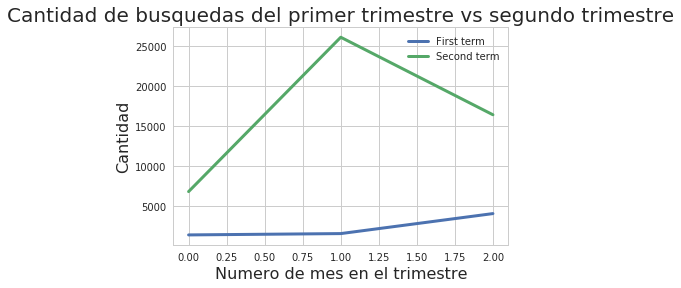

In [46]:
g = trimestres.plot(linewidth=3)
g.set_title('Cantidad de busquedas del primer trimestre vs segundo trimestre',fontsize = 20)
g.set_xlabel('Numero de mes en el trimestre',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16); #como cambio el eje x

#### ¿Se relaciona la cantidad de busquedas con la cantidad de compras a lo largo del mes? #agrega sku

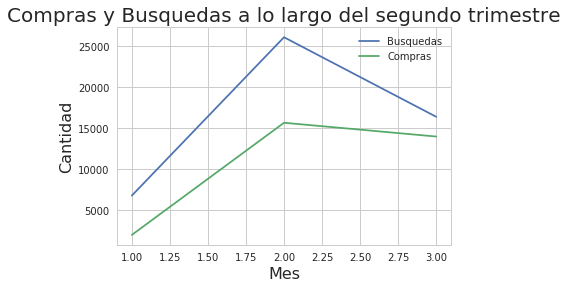

In [30]:
busquedas = searched_products[searched_products['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()
compras = checkout[checkout['timestamp'].dt.month >= 4]['timestamp'].dt.month.value_counts().rename({4:1,5:2,6:3}).sort_index()
busquedas_vs_compras = busquedas.to_frame().rename({'timestamp':'Busquedas'},axis = 'columns')
busquedas_vs_compras['Compras'] = compras
g = busquedas_vs_compras.plot()
g.set_title('Compras y Busquedas a lo largo del segundo trimestre',fontsize = 20)
g.set_xlabel('Mes',fontsize = 16)
g.set_ylabel('Cantidad',fontsize = 16);#podria comparar en el segundo trimestre que hay mas datos

#### #hay que darle algun nombre a lo que sigue

In [31]:
events['marca'] = events['model'].str.split(' ').str[0]
events['modelo'] = events['model'].str.split(' ').str[1].fillna('') + ' ' + events['model'].str.split(' ').str[2].fillna('')
events[['marca', 'modelo']].head()

,marca,modelo
0,NaN,
1,NaN,
2,iPhone,5s
3,iPhone,5s
4,Samsung,Galaxy S8


In [32]:
events.groupby('marca').agg({'event':'count'}).sort_values(by = 'event', ascending = False)

,event
marca,
iPhone,256585
Samsung,218127
Motorola,63518
LG,9724
Sony,7025
Lenovo,4779
Asus,2091
iPad,1914
Quantum,520


In [33]:
events.groupby(['marca', 'model']).agg({'event':'count'}).sort_values(by = 'event', ascending = False).head(15)

event
marca   model                        
iPhone  iPhone 6                50916
        iPhone 5s               44878
        iPhone 6S               39296
        iPhone 7                27556
Samsung Samsung Galaxy S7 Edge  23926
        Samsung Galaxy S7       19337
iPhone  iPhone 7 Plus           18792
Samsung Samsung Galaxy S8       16959
iPhone  iPhone SE               16531
Samsung Samsung Galaxy J5       13044
iPhone  iPhone 6S Plus          12855
        iPhone 6 Plus           12766
        iPhone 5c               12689
Samsung Samsung Galaxy S6 Flat  11608
        Samsung Galaxy S6 Edge  11175

In [34]:
viewed_events = events[events['event'] == 'viewed product']
leaded_events = events[events['event'] == 'lead']
conversion_events = events[events['event'] == 'conversion']
checkouted_events = events[events['event'] == 'checkout']

Text(0,0.5,'Cantidad')

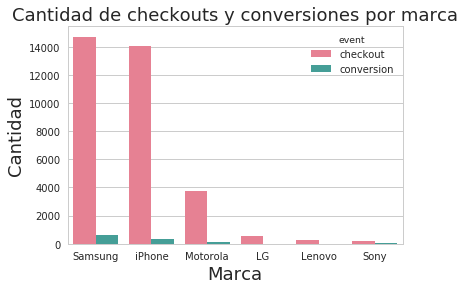

In [35]:
checkouted_vs_converted = events[(events['event'] == 'conversion') | (events['event'] == 'checkout')]
checkouted_vs_converted
pd.crosstab(checkouted_vs_converted.marca, checkouted_vs_converted.event)

g = sns.countplot(x="marca"[:5], hue="event", data=checkouted_vs_converted, palette="husl", hue_order = checkouted_vs_converted.event.value_counts().iloc[:2].index,
                 order = checkouted_vs_converted.marca.value_counts().iloc[:6].index)
g.set_title("Cantidad de checkouts y conversiones por marca", fontsize=18)
g.set_xlabel("Marca", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

Text(0,0.5,'Cantidad')

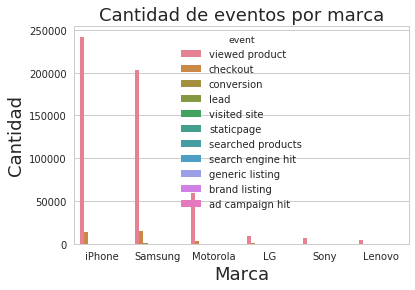

In [36]:
# es mucha la diferencia entre la cantidad de productos vistos vs checkout
g = sns.countplot(x="marca", hue="event", data=events, palette="husl", hue_order = events[['event', 'marca']].dropna().event.value_counts().iloc[:].index,
                 order = events.marca.value_counts().iloc[:6].index)
g.set_title("Cantidad de eventos por marca", fontsize=18)
g.set_xlabel("Marca", fontsize=18)
g.set_ylabel("Cantidad", fontsize=18)

In [37]:
# personas que se suscribieron para un producto
leaded_persons = leaded_events[['person','timestamp']] #448 
returning = events[(events['new_vs_returning'] == 'Returning')][['person', 'timestamp', 'channel']]
# personas que se suscribieron y volvieron
a = pd.merge(leaded_persons, returning, on='person', how='left')
a = a[(a['timestamp_y'] > a['timestamp_x'])]
# cuantas veces volvió 
a['dif'] = a['timestamp_y'] - a['timestamp_x']
a = a.groupby(['person']).agg({'timestamp_y':'count', 'dif':['min','max']}) #248
a.head()

dif                   timestamp_y
                     min               max       count
person                                                
01139919 1 days 03:37:50  44 days 21:44:45          15
01bca043 0 days 02:56:07  53 days 02:38:36           8
01db2fe6 0 days 00:51:43 100 days 06:24:31          22
03bdcd81 1 days 02:33:44 133 days 05:05:14          16
053e3907 0 days 02:58:07  31 days 04:12:14           8

In [38]:
converted = conversion_events[['person', 'timestamp']]
viewed = events[(events['event'] == 'viewed product')][['person', 'timestamp']]
a = pd.merge(viewed, converted, on='person', how='inner')
a = a[(a['timestamp_y'] > a['timestamp_x'])]
a = a[(a['timestamp_y'] > a['timestamp_x'])]
a = a.groupby(['person', 'timestamp_y']).agg({'timestamp_x':'count'})
a.head()

,,timestamp_x
person,timestamp_y,
00204059,2018-03-20 17:46:12,41
00c13dee,2018-04-26 22:28:53,11
0146a9df,2018-03-16 13:50:25,2
01db2fe6,2018-02-09 22:07:07,12
03bdcd81,2018-01-09 16:47:50,24


In [47]:
#falta agregar las compras al analisis, solo hay del checkout y de busquedas